Linear regression is a linear straight line relationship between input variables (X) and the single output variable (Y).

<img src='line.png' style='height:200px'>
<img src='ln.png'>

### Load packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([1,3,2,5,7,8,8,9,10,12])

### Visualize trend b/w data

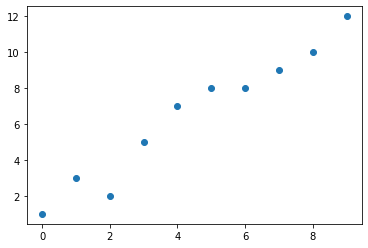

In [3]:
plt.scatter(x,y)

<img src='find_m.png'>
<img src='find_b.png'>

In [4]:
def calculate_mb(x,y):
    m = (((np.mean(x)*np.mean(y))-np.mean(x*y))/
    ((np.mean(x)**2)-np.mean(x**2)))
    
    b = np.mean(y)-m*np.mean(x)
    
    return m,b

In [5]:
m,b = calculate_mb(x,y)
print("Coef: ", m)
print("Intercept: ", b)

Coef:  1.1696969696969695
Intercept:  1.2363636363636372


Now, we have to draw a line that best suits to given data points, called regression line

In [6]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
pred_y = []
for i in x:
    pred_y.append(m*i+b)

In [8]:
print(pred_y)

[1.2363636363636372, 2.4060606060606067, 3.575757575757576, 4.745454545454546, 5.915151515151515, 7.084848484848485, 8.254545454545454, 9.424242424242422, 10.593939393939394, 11.763636363636362]


In [9]:
1*1.1696969696969695+1.2363636363636372 #mx+b

2.4060606060606067

### Draw regression line

Text(0.5, 1.0, 'Simple Linear Regression')

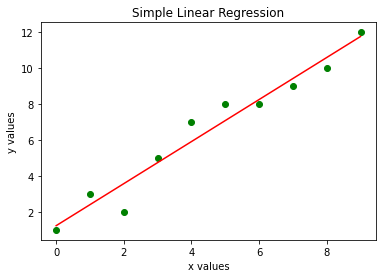

In [10]:
plt.scatter(x,y, color='green')
plt.plot(x,pred_y, color='r')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Simple Linear Regression')

In [11]:
# a   p
# 1   2
# 2   4
# 5   5
# 2   1
# 4   2


# (1-2)+(2-4)+(5-5)+(2-1)+(4-2)
# -1-2+0+1+2 = 0

### Evaluate modal performance

<img src='error.png' style='height:200px'>

### Sum of squared error

<img src='sse.png' style='height:200px'>

### The role of m,b in regression line

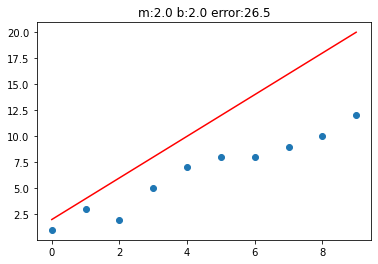

In [12]:
new_m = np.linspace(0,2,50)
new_b = np.linspace(0,2,50)
from IPython.display import clear_output

loss = []
for m,b in zip(new_m, new_b):
    yprd = [(m*i)+b for i in x]
    SSE = np.sum((y-yprd)**2)
    MSE = SSE/len(x) #Mean squared error
    loss.append([m,b,SSE,MSE])
    plt.scatter(x,y)
    plt.plot(x,yprd,c='r')
    plt.title('m:{} b:{} error:{}'.format(m,b,MSE))
    plt.pause(0.001)
    clear_output(wait=True)

### Result Analysis

In [13]:
df = pd.DataFrame(loss, columns=['m','b','SSE','MSE'])
df.head()

m         b         SSE        MSE
0  0.000000  0.000000  541.000000  54.100000
1  0.040816  0.040816  504.580175  50.458017
2  0.081633  0.081633  469.443149  46.944315
3  0.122449  0.122449  435.588921  43.558892
4  0.163265  0.163265  403.017493  40.301749

In [14]:
df[df.MSE==df.MSE.min()]

m         b       SSE      MSE
29  1.183673  1.183673  5.641399  0.56414

### Plot error rate with respect to m

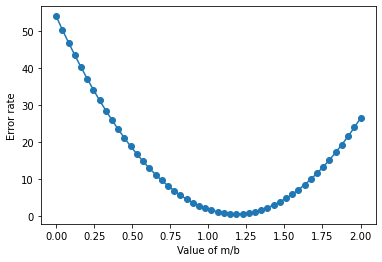

In [15]:
X = df.iloc[:,0]
Y = df.iloc[:,-1]
plt.plot(X,Y, marker='o')
plt.xlabel("Value of m/b")
plt.ylabel("Error rate")
plt.show()